<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Directions-for-homework-submission" data-toc-modified-id="Directions-for-homework-submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Directions for homework submission</a></span></li><li><span><a href="#Order-of-Magnitude-Neuroscience:-The-Entropic-Theory-of-Life-(10-pt)" data-toc-modified-id="Order-of-Magnitude-Neuroscience:-The-Entropic-Theory-of-Life-(10-pt)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Order of Magnitude Neuroscience: The Entropic Theory of Life (10 pt)</a></span></li><li><span><a href="#Population-Coding-(70-pt)" data-toc-modified-id="Population-Coding-(70-pt)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Population Coding (70 pt)</a></span><ul class="toc-item"><li><span><a href="#MM-comment:" data-toc-modified-id="MM-comment:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MM comment:</a></span></li><li><span><a href="#Single-Neuron-Tuning" data-toc-modified-id="Single-Neuron-Tuning-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Single Neuron Tuning</a></span></li><li><span><a href="#Step-1:-Analyze-Orientation-Tuning-for-All-Neurons-(25-pts)" data-toc-modified-id="Step-1:-Analyze-Orientation-Tuning-for-All-Neurons-(25-pts)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Step 1: Analyze Orientation Tuning for All Neurons (25 pts)</a></span></li><li><span><a href="#Single-neuron:-conceptual-questions-(5-pts)" data-toc-modified-id="Single-neuron:-conceptual-questions-(5-pts)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Single neuron: conceptual questions (5 pts)</a></span></li><li><span><a href="#Step-3:-Population-Level-Decoding" data-toc-modified-id="Step-3:-Population-Level-Decoding-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Step 3: Population-Level Decoding</a></span><ul class="toc-item"><li><span><a href="#Implementation-(30-pts)" data-toc-modified-id="Implementation-(30-pts)-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Implementation (30 pts)</a></span></li><li><span><a href="#Population-Decoder:-Conceptual-Questions-(10-pts)" data-toc-modified-id="Population-Decoder:-Conceptual-Questions-(10-pts)-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Population Decoder: Conceptual Questions (10 pts)</a></span></li></ul></li></ul></li></ul></div>

# Directions for homework submission

Submit each of your homework to canvas as the pdf output of the jupyter notebook, and the jupyter notebook (.ipynb). Name your files starting in the format of "Last_name_First_name_File_name" separated by underscores. 

For example, Jieyu submits two files for her homework this week: 
1. Zheng_Jieyu_HW1.pdf (the pdf output of the jupyter notebook)
    
    If you have problems rendering your notebook into pdf, you can open your notebook in a browser and print -> save as pdf. 

2. Zheng_Jieyu_HW1.ipynb

**Please make sure your notebook can be run without errors within the cns187 virtual environment.** Any file that fails to be executed on TA's end will be considered as late submissions. 

**Caltech Honor code:** Searching for the solutions online is strictly prohibited. You should refer to the textbooks and lecture slides. If you are citing any external sources online, please include a list of references. 

**Collaboration on homework assignments is encouraged.** However, **you cannot show each other the numerical answers or codes**. Please note at the beginning of each answer whom you have discussed the problems with (including TAs). 

**All the mathematics should be typed in Latex format.** You may work on a piece of paper and then type it into the notebook. Here is a useful [cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf). Please do not submit pictures of handwritten maths. 

**For the schematic and drawings to be submitted,** please display the images in markdown cells in your homework amd make sure they show up in your pdf rendering. 

**Please make sure that all your plots include a title and axis labels with units.** **One point will be deducted for each missing element.**

------------

# Order of Magnitude Neuroscience: The Entropic Theory of Life (10 pt)



1. Each of us is born with a certain amount of Shannon entropy, namely the total uncertainty about how our life will unfold.
2. Every yes/no decision we make in life reduces that entropy by 1 bit.
3. When that entropy drops to zero we die, because death is the only state with no remaining uncertainty.
This simple framework explains many things, for example:
- Making decisions feels hard and unpleasant. Intuitively we understand that they bring us closer to death.
- People in stressful professions that require many decisions tend to die early.
- Procrastination, namely the intentional delaying of decisions, evolved as a survival strategy.

Please discuss whether this a reasonable theory. If so, estimate the entropy of human babies. If not, explain why.

The theory oversimplifies the concept of entropy as it applies to human life and decision-making. Human life is influenced by much more than binary yes or no decisions. Genetics, external environment, social interactions, and random occurrences all contribute to the shaping of a person's life. Further, a 1 bit representation for every choice is very inaccurate given that ther is much more complexity involved with decision-making. Due to varying degrees of impact and uncertainty, some decisions may weigh more heavily on reducing the "uncertainty" in life. Therefore, I believe it is unreasonable to use this theory as a representation for the unfolding of human lives.

# Population Coding (70 pt) 

This problem studies the responses of primary visual cortical (V1) neurons in the macaque brain to oriented gratings ([Amin Zandvakili and Adam Kohn, 2019](http://dx.doi.org/10.6080/K0B27SHN)). Our objective is to analyze the neural code used by this neural population. The data were recorded from a macaque via a Utah array (96 channel rectangular electrode array) implanted into V1. 

After mapping the retinotopic receptive field (RF) of all recorded neurons, the experimenters presented one of eight drifting gratings of systematically varying orientation (0, 22.5, 45, ..., 157.5 degrees) 400 times and counted spikes in the 1.28s following stimulus onset for each of the V1 neurons recorded by the array. 

We will perform the following calculation:
1. Compute and analyze orientation **tuning curves** for all neurons individually.
2. Train a **linear decoder** to read out orientation information from the neural population. 

$\mathbf{Data}$:
Download the .mat file posted on Canvas. Inside you should find the following variables:
$$
\begin{align}
spikes:& \text{ n_neuron x n_trial matrix of spike counts. Note all neurons were recorded concurrently.} \\
stim:& \text{ n_trial x 1 vector of trial type identities. Values are integers 1-8 corresponding to grating orientations 0:22.5:157.5.} \\
&\text{Trial order here is matched to the column order in the spikes matrix.} \\
channelMap:& \text{ n_neuron x 1 vector mapping neurons to channel indices on the Utah array.} \\ 
    &\text{Values are integers 1-96 corresponding to Utah array channels given in "channelInfo".} \\
channelInfo:& \text{ n_channel x 2 matrix with receptive field info for each channel in the Utah array.} \\
    &\text{Columns 1 and 2 correspond to x and y visual field coordinates respectively for each channel.} \\
\end{align}
$$

$\mathbf{Important \ Notes}$: Multiple neurons can be mapped to the same channel in this dataset, hence why there are more neurons than channels. **All neurons on the same channel are given the same x and y coordinates for the RFs.** Therefore, when computing neuron pairing as a function of distance, some neuron pair distances should be 0 (neurons on the same channel). Think about why we can do this -- we will ask you later. 

$\mathbf{Data \ Source}$: Amin Zandvakili and Adam Kohn (2019). Paired V1-V2 neuronal spiking responses in anesthetized macaque monkey. CRCNS.org. http://dx.doi.org/10.6080/K0B27SHN


## Single Neuron Tuning

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import io

#Useful for Step 2
from scipy.spatial import distance_matrix

# to run this, install sklearn into your conda environment. 
#Useful for Step 3
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

mat = io.loadmat('Data_Hwk7-1.mat')

#Unpack variables
spikes  = mat['spikes']/1.28 #Convert to Hz
chanMap = np.squeeze(mat['channelMap'])
chanInf = mat['channelInfo']
stim    = np.squeeze(mat['stim'])

#Some useful stuff
stim_ori = [str(i) for i in np.arange(0,180,22.5)]

## Step 1: Analyze Orientation Tuning for All Neurons (25 pts) 

We should first look at the tuning properties of each neuron individually to the stimuli: 

To this end, please $\mathbf{generate \ summary \ plots \ of \ the \ following}$:
1) Histogram of mean firing rates for all neurons
2) Heat map of all orientation tuning curves for all neurons. Should be n_neuron x 8 matrix with neuron order sorted by preferred category.
3) Histogram showing number of preferred neurons for each of the 8 orientations.
4) Scatter plot of receptive field location with each dot colored by preferred orientation (where firing rate is maximal).


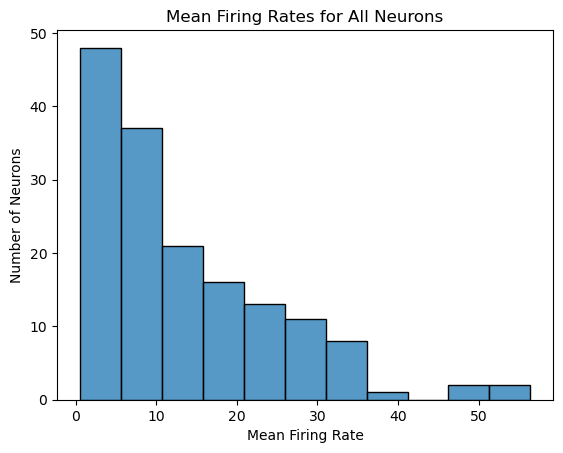

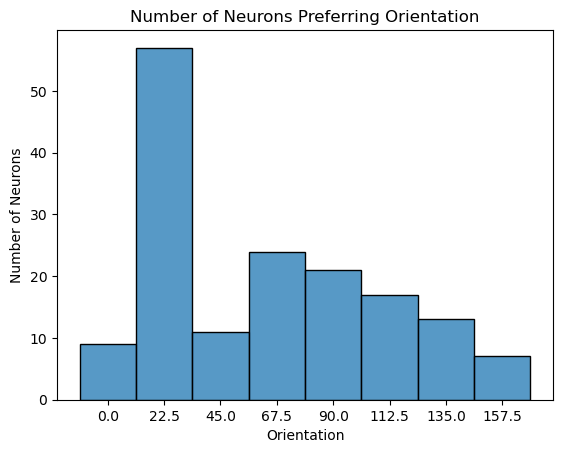

In [2]:
mean_fr = np.mean(spikes, axis=1)
sns.histplot(mean_fr)
plt.title("Mean Firing Rates for All Neurons")
plt.ylabel("Number of Neurons")
plt.xlabel("Mean Firing Rate")
plt.show()
curves = []
for i,train in enumerate(spikes):
    curves.append([])
    for j in range(1,9):
        curves[i].append(np.mean(train[stim == j]))
curves = np.array(curves)
sorter = np.argsort(np.argmax(curves, axis=1))
sns.histplot(np.argmax(curves[sorter], axis=1) + 1, bins=np.arange(1,10))
ticks = [(i + i+1)/2 for i in range(1,9)]
plt.xticks(ticks, stim_ori)
plt.title("Number of Neurons Preferring Orientation")
plt.xlabel("Orientation")
plt.ylabel("Number of Neurons")
plt.show()

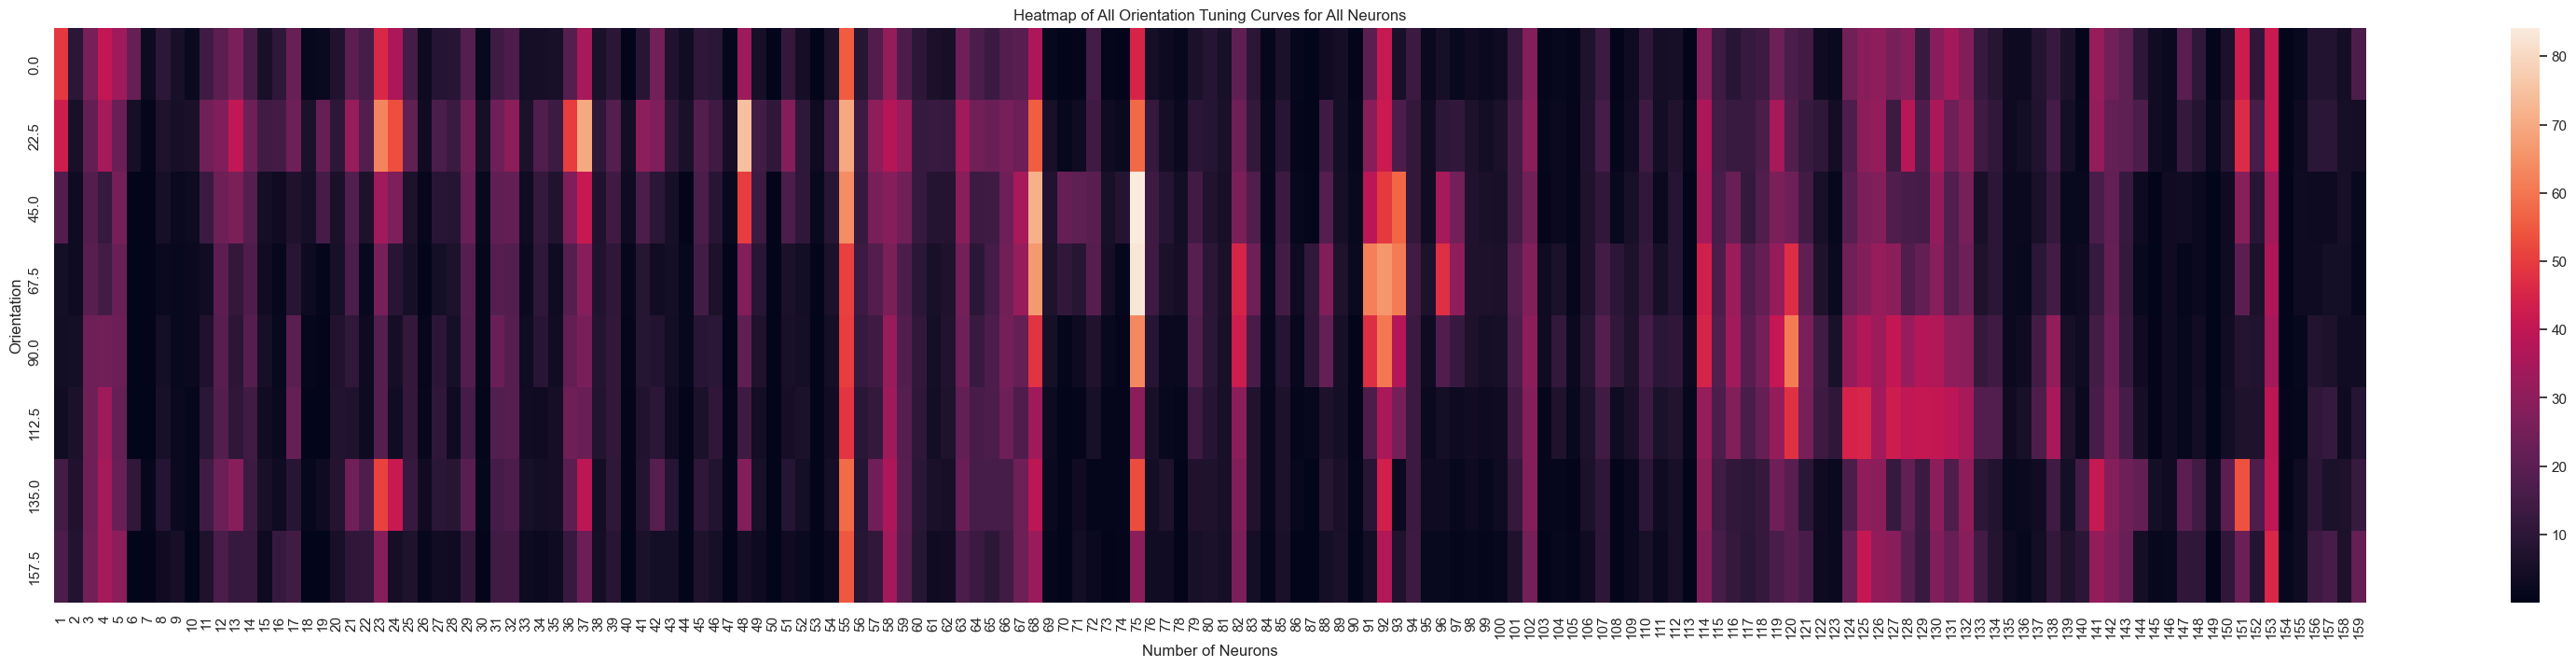

In [3]:
sns.set(rc = {'figure.figsize':(40, 8)})
sns.heatmap(curves[sorter].T, yticklabels=stim_ori, xticklabels=np.arange(1,160))
plt.title("Heatmap of All Orientation Tuning Curves for All Neurons")
plt.xlabel("Number of Neurons")
plt.ylabel("Orientation")
plt.show()

In [4]:
sns.reset_orig()

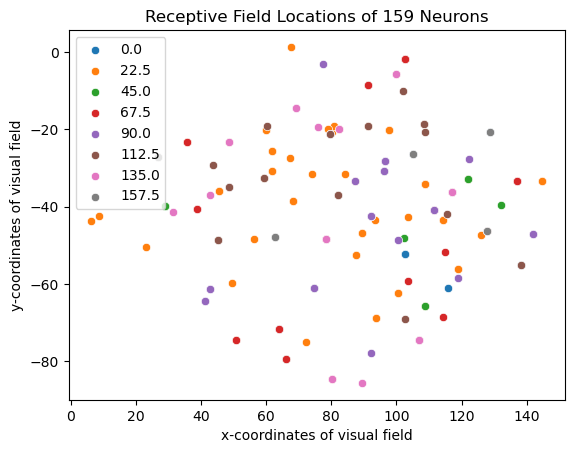

In [5]:
X = [[] for _ in range(8)]
Y = [[] for _ in range(8)]
for i,chan in enumerate(chanMap[sorter]):
    x, y = chanInf[chan-1]
    idx = np.argmax(curves[sorter], axis=1)[i]
    X[idx].append(x)
    Y[idx].append(y)
for x, y in zip(X,Y):
    sns.scatterplot(x=x,y=y)
plt.legend(stim_ori, loc="upper left")
plt.title("Receptive Field Locations of 159 Neurons")
plt.xlabel("x-coordinates of visual field")
plt.ylabel("y-coordinates of visual field")
plt.show()

## Single neuron: conceptual questions (5 pts) 

(1) Is the firing rate distribution typical of the cortex given what we've discussed in class? How and why are they the same or different? 

    Hint: Think about how neurons are selected for inclusion in this dataset (You might want to check the paper). 

(2) Is the distribution of preferred orientations uniform across the neural population? Explain any systematic patterns present in plots 3 and 4 given what is known about the organization of V1.


(1) This firing rate distribution does not seem typical of the whole cortex given that in V1 there are orientation columns in the striate cortex that each have preferences for orientation. The reason for the difference could be due to the paper's selection strategy of selecting the largest and best-aligned populations of neurons, while discarding those that fire at rate less than 0.5 Hz, as opposed to uniformly selecting neurons from the whole cortex.

(2) It appears that for orientation of 22.5 it can be seen in the histogram and scatter plot, these are the most preferred neurons from the neurons considered. It would also appear that there is grouping in the orientation preferences for the visual field with particular preferences being near at least one other shared preference neuron which makes sense when one considers the format of complex cells and how they prefer specific orientations.

## Step 3: Population-Level Decoding



We will now train a linear decoder to read out the identity of the presented stimulus from the provided spike data, and examine the effect of correlations on information at the population level. We will use the ordinary least squares (OLS) solution as a simplified linear model. 

Recall that, to implement binary classification using a linear model, we need a model of the form:
$$
\begin{align}
Y = \beta_0 + \sum_{i=0}^n X_i\beta_i
\end{align}
$$

where $Y$ are the stimulus identities mapped to ${-1,+1}$ for the category groups being discriminated, the $X_i$'s the spike counts for every neuron $i$, and $\beta_{i,0}$  the weights that are learned through OLS. 

We will implement pairwise decoding - i.e., try to discriminate each stimulus category from every other stimulus category, considering every unique pair of stimuli (grating orientations) in the dataset. This amounts to training and testing $C^2_8$ (28) decoders. For each decoder, +1 gets mapped to one of the chosen stimuli (e.g. all gratings of orientation 22.5 degrees), and -1 is mapped to the other chosen stimulus. Then, to report overall decoder accuracy, average over the classification accuracy yielded by each decoder. 

We will train and test decoders via K-fold cross-validation. For the test set, we set aside the same amount of data for each category. We train the decoder using the rest of the data, then test the decoder and report classification accuracy on the data we set aside. This procedure is done K times (K-folds/-iterations), with the data from each category split into K parts of equal size. For every iteration, a different set of the K parts is used as the test set and all other parts are used for training. 

### Implementation (30 pts)

$\mathbf{Generate \ the \ following\ plots}$: 

(1) Plot the cross-validated classification accuracy for each pair of stimulus categories.

(2) Run the decoding again but sub-sample the number of neurons from 1 to n_neurons (this changes your "K"). Plot average decoding accuracy over all pairs as a function of the number of neurons.

(3) do the same analysis as in 2), but this time shuffle the trials for every neuron independently within each stimulus category before running the decoding analysis, to destroy trial correlations. Overlay this curve on top of the one you generated in (2).

In [6]:
def destroy_trial_correlations(X,y):
    ''' Need to independently shuffle trials for every neuron within-category
        This destroys potential effects of noise correlation on decoding.

    Args:
    X: n_trial x n_neuron, matrix of firing rates 
    y: n_trial x 1       , vector of trial labels (should be either +1/-1 for linear classifier)

    Return:
    X_shuf: n_trial x n_neuron, matrix with categories shuffled for each neuron
    '''
    assert len(X) == len(y)
    shuffle = np.random.permutation(len(X))
    return X[shuffle], y[shuffle]

In [7]:
def fit_all_linear_models(spikes,stim,k_folds,do_shuffle=False):
    '''Method for fitting all pair-wise linear models

    Args:
    spikes: n_trial x n_neuron, matrix of firing rates
    stim:   n_trial x 1       , vector of stimulus identities (ints 1-8)
    k_folds: number of iterations, based on your test set size
    do_shuffle: whether your spikes/firing rates are shuffled or not, using the function `destroy_trial_crrelation`
    
    Return:
    stim_acc: n_stim x n_stim, matrix of binary classification accuracy
   
    Aside:
    n_stim - number of unique stimuli (n_stim = 8 for this dataset)
    stim_acc can just be plotted as an image with only the upper diagonal populated.
    '''
        
    stim_acc = np.zeros(shape=(8,8))
    
    for i in range(8):
        for j in range(i+1,8):
            
            clf = LinearRegression()
            skf = StratifiedKFold(n_splits=k_folds)
            indices = np.where((stim == i+1) | (stim == j+1))
            X = spikes[indices]
            y = np.array([1 if ori == i+1 else -1 for ori in stim[indices]])
            
            if do_shuffle:
                X, y = destroy_trial_correlations(X, y)
                
            cv_acc = []
            for train_index, test_index in skf.split(X, y):
                clf.fit(X[train_index], y[train_index])
                cv_acc.append(clf.score(X[test_index], y[test_index]))
            stim_acc[i,j] = np.mean(cv_acc)
        
    
    return stim_acc

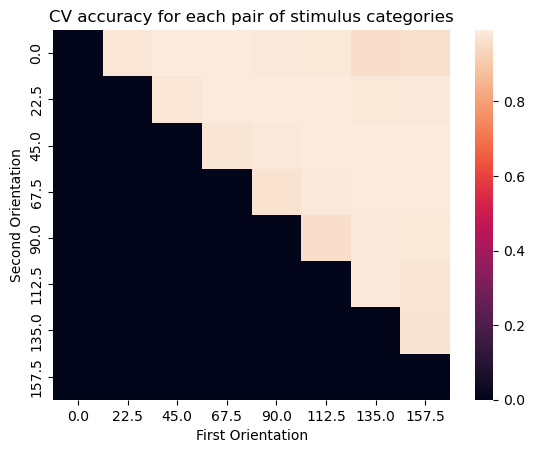

0.9813650493278713

In [8]:
stim_acc = fit_all_linear_models(spikes.T, stim, 10, do_shuffle=False)
sns.heatmap(stim_acc, yticklabels=stim_ori, xticklabels=stim_ori)
plt.title("CV accuracy for each pair of stimulus categories")
plt.xlabel("First Orientation")
plt.ylabel("Second Orientation")
plt.show()
np.mean(stim_acc[np.nonzero(stim_acc)])

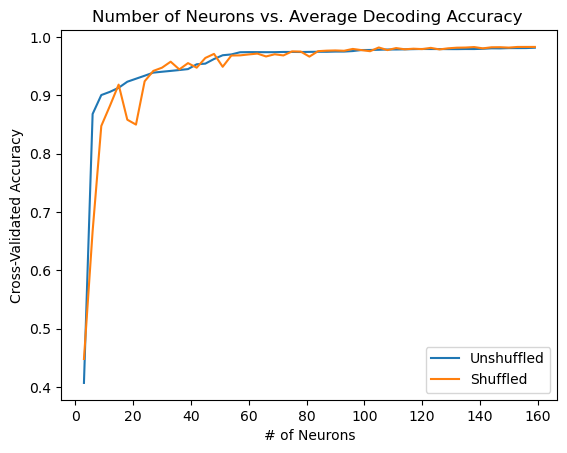

In [11]:
num_neurons = []
accuracies = []
for sample_size in range(3, len(spikes)+1, 3):
    num_neurons.append(sample_size)
    stim_acc = fit_all_linear_models(spikes[0:sample_size].T, stim, 10, do_shuffle=False)
    accuracies.append(np.mean(stim_acc[np.nonzero(stim_acc)]))
plt.plot(num_neurons, accuracies)

num_neurons = []
accuracies = []
for sample_size in range(3, len(spikes)+1, 3):
    indices = np.random.choice(159, sample_size, replace=False)
    num_neurons.append(sample_size)
    stim_acc = fit_all_linear_models(spikes[indices].T, stim, 10, do_shuffle=True)
    accuracies.append(np.mean(stim_acc[np.nonzero(stim_acc)]))

plt.plot(num_neurons, accuracies)
plt.title("Number of Neurons vs. Average Decoding Accuracy ")
plt.xlabel("# of Neurons")
plt.ylabel("Cross-Validated Accuracy")
plt.legend(["Unshuffled", "Shuffled"])
plt.show()

### Population Decoder: Conceptual Questions (10 pts)

(1) If you implemented everything correctly, you should find that the decoding accuracy is quite high in plot 1. Discuss why that might be.

(2) As the number of cells used increases, how does the shuffled and unshuffled decoding accuracy change? What does this tell you about the effect of correlations as the population of V1 cells gets increasingly larger?

(1) This might most likely be attributed to the large number of neurons as well as the fact that the decoding between two preferences is more likely to lead to high accuracies than decoding versus all preferences. This is because the correlation has less of a negative effect, and thus does not limit information gain to greatly

(2) They both increase as the cell populations increase, meaning that the effect of correlations is greater on smaller population codes. As the population increases, more information can be accurately decoded for pairwise correlations. 

Note: It also seems that in this case, there was not much difference seen in the shuffled decoding vs the unshuffled decoding aside from the slight noise seen in the accuracy curve